In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn
datasets=['statlog','pendigits','musk','letter','covertype','miniboone','cardio','yahoo']#,'scene15'

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# test loading data and a tree classifier
X_train=np.loadtxt("../data/statlog/sat.trn")
Y_train= X_train[:,-1]
X_train=X_train[:,:-1]
X_test=np.loadtxt("../data/statlog/sat.tst")
Y_test= X_test[:,-1]
X_test=X_test[:,:-1]
clf = tree.DecisionTreeClassifier(criterion='miser', splitter='best' )
clf = clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
print(np.sum(Y_pred==Y_test)/len(Y_test))

In [4]:

def get_data(data):
    if data == 'statlog':
        X_train=np.loadtxt("../data/statlog/sat.trn")
        Y_train= X_train[:,-1]
        X_train=X_train[:,:-1]
        X_test=np.loadtxt("../data/statlog/sat.tst")
        Y_test= X_test[:,-1]
        X_test=X_test[:,:-1]
        
        return X_train,Y_train,X_test,Y_test
    
    elif data == 'pendigits':
        X_train=np.loadtxt("../data/pendigits/pendigits.tra",delimiter=',')
        Y_train= X_train[:,-1]
        X_train=X_train[:,:-1]
        X_test=np.loadtxt("../data/pendigits/pendigits.tes",delimiter=',')
        Y_test= X_test[:,-1]
        X_test=X_test[:,:-1]
        
        return X_train,Y_train,X_test,Y_test
    
    elif data == 'musk':
        X=pd.read_csv("../data/musk/clean2.data",delimiter=',',header=None)
        X=X.iloc[:,2:].values
        Y= X[:,-1]
        X=X[:,:-1]
        X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.33, random_state=105)
        return  X_train,Y_train,X_test,Y_test
    
    elif data == 'letter':
        X=pd.read_csv("../data/letter/letter-recognition.data",delimiter=',',header=None)
        X=X.iloc[:,:].values
        Y= X[:,0]
        Y=np.asarray([ord(y) for y in Y])
        X=X[:,1:]
        X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.33, random_state=105)
        return  X_train,Y_train,X_test,Y_test       

    elif data == 'covertype':
        X=pd.read_csv("../data/covertype/covtype.data",delimiter=',',header=None)
        X=X.iloc[:,:].values
        Y= X[:,-1]
        X=X[:,:-1]
        X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.33, random_state=105)
        return  X_train,Y_train,X_test,Y_test   
    elif data == 'miniboone':
        X=pd.read_csv("../data/miniboone/MiniBooNE.csv")
        X=X.iloc[:,:].values
        Y= X[:,0]
        Y=Y.astype("float")
        X=X[:,1:]
        X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.33, random_state=105)
        
        return  X_train,Y_train,X_test,Y_test   
    elif data == 'cardio':
        X=pd.read_csv("../data/cardio/CTG.csv",header=None,delimiter=';')
        X=X.iloc[:,:].values
        Y= X[:,-2]
        Y=Y.astype("float")
        X=X[:,:-4]
        X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.33, random_state=105)   
        return  X_train,Y_train,X_test,Y_test
    
    elif data == 'yahoo':
        X_train=np.loadtxt("../data/yahoo/set1.train.csv",delimiter=',')
        Y_train= X_train[:,0]
        X_train =X_train[:,1:]
        X_test=np.loadtxt("../data/yahoo/set1.test.csv",delimiter=',')
        Y_test= X_test[:,0]
        X_test=X_test[:,1:]
        
        return X_train,Y_train,X_test,Y_test 
    
    


In [ ]:
# test get data 

# X_train,Y_train,X_test,Y_test=get_data('yahoo')
# clf = tree.DecisionTreeClassifier(criterion='miser', splitter='best' )
# clf = clf.fit(X_train, Y_train)
# Y_pred=clf.predict(X_test)
# print(np.sum(Y_pred==Y_test)/len(Y_test))

In [7]:
# convert data to svm light

# from sklearn.datasets import dump_svmlight_file
# import os

# for data in datasets:
#     X_train,Y_train,X_test,Y_test =get_data(data)
# #     os.mkdir('../data/'+data+'/svm/')
#     dump_svmlight_file(X_train, Y_train, '../data/'+data+'/svm/train.txt', zero_based=False, comment=None, query_id=[0]*len(Y_train), multilabel=False)
#     dump_svmlight_file(X_test, Y_test, '../data/'+data+'/svm/test.txt', zero_based=False, comment=None, query_id=[0]*len(Y_test), multilabel=False)
#     print(data+": "+str(Y_test[0]))

statlog: 3.0
pendigits: 8.0
musk: 1.0
letter: 81
covertype: 1
miniboone: 1.0
cardio: 6.0
yahoo: 0.0


In [1]:
import sys 
import matplotlib.pyplot as plt
from Greedymiser.miser import miser

In [27]:

steps=[0.01,0.1,0.5,0.9]
results=[]
for step in steps:
    x=miser()
    x.DEPTH=10
    x.STEPSIZE=step
    x.ITER=100
    report=x.fit(path='synth',costs= "s",l =5)
    results.append(report)
    print("done step: %f" % step)


done step: 0.010000
done step: 0.100000
done step: 0.500000
done step: 0.900000


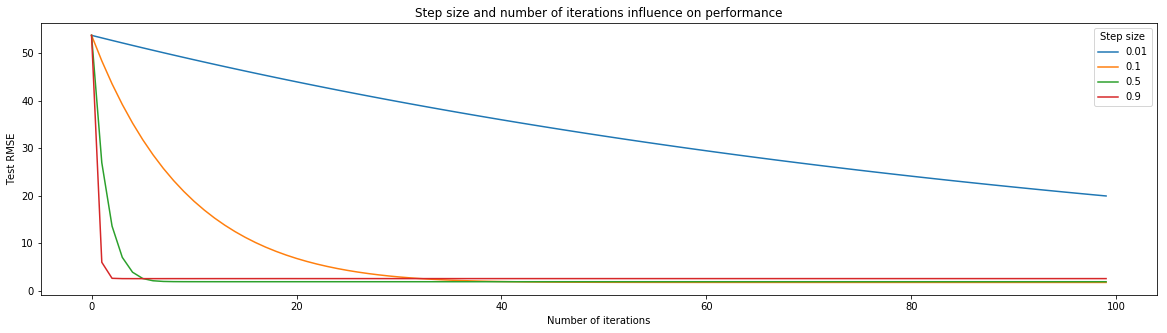

In [28]:
plt.figure(figsize=(20,5))
for s in range(len(steps)):
    plt.plot([results[s][k][2] for k in range(len(results[s]))],label=steps[s])
plt.legend(loc="upper right",title="Step size")
plt.title("Step size and number of iterations influence on performance")
plt.xlabel("Number of iterations")
plt.ylabel("Test RMSE")
plt.show()

In [48]:

l=[0,0.01,0.1,1,5,10,30,50,80,100]
results=[]
for step in l:
    x=miser()
    x.DEPTH=10
    x.STEPSIZE=0.1
    x.ITER=100
    report=x.fit(path='synth',costs= "s",l =step)
    results.append(report)
    print("done lambda: %f" % step)

done lambda: 0.000000
done lambda: 0.010000
done lambda: 0.100000
done lambda: 1.000000
done lambda: 5.000000
done lambda: 10.000000
done lambda: 30.000000
done lambda: 50.000000
done lambda: 80.000000
done lambda: 100.000000


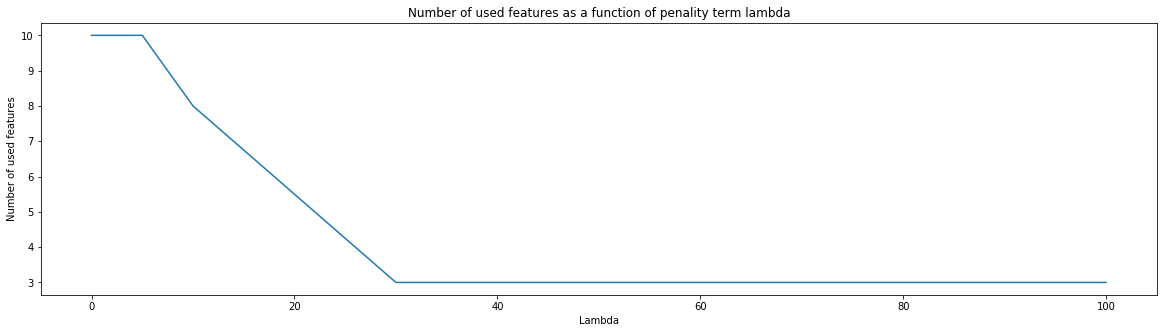

In [49]:
plt.figure(figsize=(20,5))
plt.plot(l,[len(results[s][-1][3])-np.count_nonzero(results[s][-1][3] ) for s in range(len(l))],label=l[s])
plt.title("Number of used features as a function of penality term lambda")
plt.xlabel("Lambda")
plt.ylabel("Number of used features")
plt.show()

In [8]:

l=[0,0.01,0.1,1,5,10,20,30,50,80,100]
results=[]
for step in l:
    x=miser()
    x.DEPTH=4
    x.STEPSIZE=0.1
    x.ITER=50
    report=x.fit(path='synth',costs= "s",l =step)
    results.append(report)
    print("done lambda: %f" % step)

done lambda: 0.000000
done lambda: 0.010000
done lambda: 0.100000
done lambda: 1.000000
done lambda: 5.000000
done lambda: 10.000000
done lambda: 20.000000
done lambda: 30.000000
done lambda: 50.000000
done lambda: 80.000000
done lambda: 100.000000


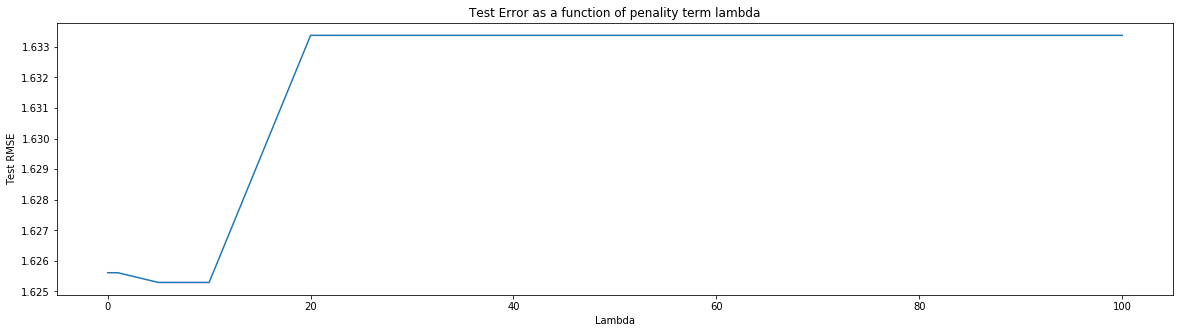

In [10]:
plt.figure(figsize=(20,5))
plt.plot(l,[results[s][-1][2] for s in range(len(l))],label="test")
plt.title("Test Error as a function of penality term lambda")
plt.xlabel("Lambda")
plt.ylabel("Test RMSE")
plt.show()

In [6]:

steps=[2,4,8,10]
results=[]
for step in steps:
    x=miser()
    x.DEPTH=step
    x.STEPSIZE=0.1
    x.ITER=100
    report=x.fit(path='synth',costs= "s",l =20)
    results.append(report)
    print("done depth: %f" % step)

done depth: 2.000000
done depth: 4.000000
done depth: 8.000000
done depth: 10.000000


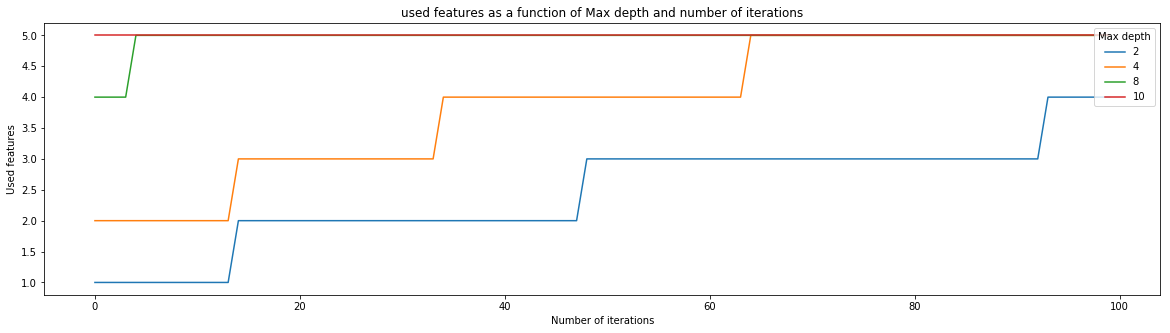

In [7]:
plt.figure(figsize=(20,5))
for s in range(len(steps)):
    plt.plot([len(results[s][k][3])-np.count_nonzero(results[s][k][3] ) for k in range(len(results[s]))],label=steps[s])
plt.legend(loc="upper right",title="Max depth")
plt.title("used features as a function of Max depth and number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Used features")
plt.show()